# Adaline Model (Scratch)

For this section of the project we will train & test mutliple Adaline models made from scratch using the `AdalineGD` (Gradient Descent) and the `AdalineSGD` (Stochastic Gradient Descent) classes provided by the book *Machine Learning with PyTorch and Scikit-Learn* by Sebastian Rashka, Yuxi (Hayden) Liu, & Vahid Mirjalili. I will modify the code for the UCI Adult Income dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

`AdalineGD` Class

In [2]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    # Different from Perceptron Class: weight and bias are updated by minimizing the loss function (mean squared error) via gradient descent
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    # No effect on the code since it is simply an identity function. 
    # We could write `output = self.net_input(X)` directly instead. The purpose of the activation is more conceptual, i.e.,  
    # in the case of logistic regression (as we will see later), we could change it to
    # a sigmoid function to implement a logistic regression classifier.
    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

`AdalineSGD` Class

In [3]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

---

## Reload Preprocessed Data Created in *01_preprocess.ipynb*

Our data has already been processed, so all we have to do is relead it into this notebook. 

In [4]:
# Reload features
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test  = pd.read_csv("../data/processed/X_test.csv")

# Reload targets (squeezed into Series)
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze("columns")
y_test  = pd.read_csv("../data/processed/y_test.csv").squeeze("columns")

# Align test columns to train columns (critical)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

We have to convert our data to numpy as the `Percepton` class takes in the parameters of `X` and `y` as array like.

In [5]:
Xtr = X_train.to_numpy(dtype=np.float64, copy=False)
Xte = X_test.to_numpy(dtype=np.float64, copy=False)
ytr = y_train.to_numpy(dtype=np.int64, copy=False)
yte = y_test.to_numpy(dtype=np.int64, copy=False)

---

## Training the Adeline (Gradient Descent) Model

- **Cross-validation on training only**: We score each `(eta, n_iter)` combo with 3-fold StratifiedKFold using only `X_train, y_train`. No peeking at test.

- **Pick best hyperparams**: Choose the pair with the highest mean CV accuracy (tie-break on smaller `n_iter`).

- **Final training**: Retrain a AdalineGD on the full training set using the chosen hyperparams.

- **Single test evaluation**: Report accuracy, confusion matrix, and classification report on the held-out test set.

- **Convergence plot**: Show misclassifications per epoch (`errors_`) for the final model.

| Note: We are not touching `X_val` here. Save that for the final, overall best model across all families.

In [6]:
def cv_mean_accuracy_adaline(eta, n_iter, X, y, n_splits=3, seed=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    scores = []
    y_int = y.astype(int)  # accuracy expects ints
    for tr_idx, val_idx in skf.split(X, y_int):
        X_tr, X_val = X[tr_idx], X[val_idx]
        y_tr, y_val = y[tr_idx], y_int[val_idx]
        model = AdalineGD(eta=eta, n_iter=n_iter, random_state=seed)
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        scores.append(accuracy_score(y_val, preds))
    return float(np.mean(scores))

In [7]:
eta_grid    = [0.0005, 0.001, 0.005, 0.01]   # Adaline GD needs small etas
n_iter_grid = [50, 100, 150, 200]

best = {"eta": None, "n_iter": None, "cv_acc": -1.0}
for eta, n_iter in product(eta_grid, n_iter_grid):
    cv_acc = cv_mean_accuracy_adaline(eta, n_iter, Xtr, ytr, n_splits=3, seed=42)
    if (cv_acc > best["cv_acc"]) or (cv_acc == best["cv_acc"] and (n_iter < (best["n_iter"] or 10))):
        best.update({"eta": eta, "n_iter": n_iter, "cv_acc": cv_acc})

print(f"Selected by CV (Adaline-GD) → eta={best['eta']}, n_iter={best['n_iter']}, mean CV acc={best['cv_acc']:.4f}")

Selected by CV (Adaline-GD) → eta=0.01, n_iter=200, mean CV acc=0.8344


In [8]:
final_ad = AdalineGD(eta=best["eta"], n_iter=best["n_iter"], random_state=42)
final_ad.fit(Xtr, ytr)

y_pred = final_ad.predict(Xte)
acc = accuracy_score(yte, y_pred)
print(f"\nADALINE-GD — FINAL on TEST: Accuracy={acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(yte, y_pred))
print("\nClassification Report:\n", classification_report(yte, y_pred, digits=4))



ADALINE-GD — FINAL on TEST: Accuracy=0.8310
Confusion Matrix:
 [[5665  269]
 [1052  829]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8434    0.9547    0.8956      5934
           1     0.7550    0.4407    0.5566      1881

    accuracy                         0.8310      7815
   macro avg     0.7992    0.6977    0.7261      7815
weighted avg     0.8221    0.8310    0.8140      7815



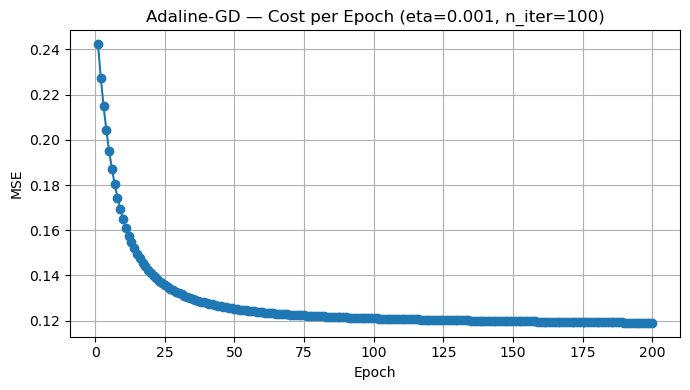

In [20]:
# Cost curve (MSE)
plt.figure(figsize=(7,4))
plt.plot(range(1, len(final_ad.losses_)+1), final_ad.losses_, marker='o')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title(f"Adaline-GD — Cost per Epoch (eta={best['eta']}, n_iter={best['n_iter']})")
plt.grid(True)

# Save into outputs/graphs folder
plt.tight_layout()
plt.savefig("../outputs/graphs/adalineGD_cost-per-epoch.png")

# Display as well
plt.show()


---

## Training the Adeline (Stochastic Gradient Descent) Model

- **Cross-validation on training only**: We score each `(eta, n_iter)` combo with 3-fold StratifiedKFold using only `X_train, y_train`. No peeking at test.

- **Pick best hyperparams**: Choose the pair with the highest mean CV accuracy (tie-break on smaller `n_iter`).

- **Final training**: Retrain a AdalineSGD on the full training set using the chosen hyperparams.

- **Single test evaluation**: Report accuracy, confusion matrix, and classification report on the held-out test set.

- **Convergence plot**: Show misclassifications per epoch (`errors_`) for the final model.

| Note: We are not touching `X_val` here. Save that for the final, overall best model across all families.

In [10]:
def cv_mean_accuracy_adaline_sgd(eta, n_iter, X, y, n_splits=3, seed=42):
    """
    Mean CV accuracy for (eta, n_iter) using StratifiedKFold on TRAINING data only.
    If a fold numerically diverges (overflow/NaN), that fold gets score=0.0.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    scores = []
    y_int = y.astype(int)   # for splitter & accuracy

    for tr_idx, val_idx in skf.split(X, y_int):
        X_tr, X_val = X[tr_idx], X[val_idx]
        y_tr, y_val = y[tr_idx], y_int[val_idx]
        try:
            # make NumPy raise on overflow/invalid so we can catch it
            with np.errstate(over='raise', invalid='raise'):
                m = AdalineSGD(eta=eta, n_iter=n_iter, shuffle=True, random_state=seed)
                m.fit(X_tr, y_tr)

                # if training obviously diverged, count as 0
                if not m.losses_ or not np.isfinite(m.losses_[-1]) or m.losses_[-1] > 1e6:
                    scores.append(0.0); continue

                preds = m.predict(X_val)        # threshold=0.5
                if np.any(~np.isfinite(preds)):
                    scores.append(0.0); continue

                scores.append(accuracy_score(y_val, preds))
        except FloatingPointError:
            scores.append(0.0)
        except Exception:
            scores.append(0.0)

    return float(np.mean(scores)) if scores else 0.0

In [11]:
eta_grid    = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4, 1e-3]
n_iter_grid = [25, 50, 100, 150]

best = {"eta": None, "n_iter": None, "cv_acc": -1.0}
for eta, n_iter in product(eta_grid, n_iter_grid):
    cv_acc = cv_mean_accuracy_adaline_sgd(eta, n_iter, Xtr, ytr, n_splits=3, seed=42)
    if (cv_acc > best["cv_acc"]) or (cv_acc == best["cv_acc"] and (best["n_iter"] is None or n_iter < best["n_iter"])):
        best.update({"eta": eta, "n_iter": n_iter, "cv_acc": cv_acc})

print(f"Selected by CV (Adaline-SGD) → eta={best['eta']}, n_iter={best['n_iter']}, "
      f"mean CV acc={best['cv_acc']:.4f}")

Selected by CV (Adaline-SGD) → eta=0.001, n_iter=100, mean CV acc=0.8434


In [12]:
final_adsgd = AdalineSGD(eta=best["eta"], n_iter=best["n_iter"], shuffle=True, random_state=42)
final_adsgd.fit(Xtr, ytr)

# single evaluation on TEST
y_pred = final_adsgd.predict(Xte)
acc = accuracy_score(yte, y_pred)
print(f"\nADALINE-SGD — FINAL on TEST: Accuracy={acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(yte, y_pred))
print("\nClassification Report:\n", classification_report(yte, y_pred, digits=4))


ADALINE-SGD — FINAL on TEST: Accuracy=0.8321
Confusion Matrix:
 [[5592  342]
 [ 970  911]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8522    0.9424    0.8950      5934
           1     0.7271    0.4843    0.5814      1881

    accuracy                         0.8321      7815
   macro avg     0.7896    0.7133    0.7382      7815
weighted avg     0.8221    0.8321    0.8195      7815



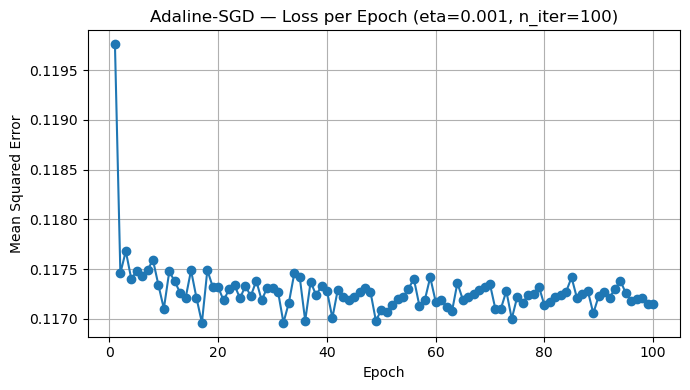

In [18]:
# Cost curve (MSE)
plt.figure(figsize=(7,4))
plt.plot(range(1, len(final_adsgd.losses_) + 1), final_adsgd.losses_, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title(f"Adaline-SGD — Loss per Epoch (eta={best['eta']}, n_iter={best['n_iter']})")
plt.grid(True)

# Save into outputs/graphs folder
plt.tight_layout()
plt.savefig("../outputs/graphs/adalineSGD_cost-per-epoch.png")

# Display as well
plt.show()


---

## Final Report
`Adaline-GD`, tuned with `η=0.01` and 200 iterations, reached 83.44% CV accuracy and 83.10% test accuracy. It performed very well on the majority class (recall ≈95%) but struggled with the minority class (recall ≈44%), though precision stayed decent (≈76%). Overall, it provides a stable linear baseline but remains biased toward lower-income predictions.

`Adaline-SGD`, tuned with `η=0.001` and 100 iterations, achieved 84.34% CV accuracy and 83.21% on the test set. Compared to GD, it improved minority recall (48% vs. 44%) at a slight cost to precision. Majority performance remained strong, and overall macro F1 was a bit higher, making SGD the slightly better-balanced variant between the two.